# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import test_Stats as ts
import resampler_Stat as rs

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
data.columns

Index([u'id', u'ad', u'education', u'ofjobs', u'yearsexp', u'honors',
       u'volunteer', u'military', u'empholes', u'occupspecific', u'occupbroad',
       u'workinschool', u'email', u'computerskills', u'specialskills',
       u'firstname', u'sex', u'race', u'h', u'l', u'call', u'city', u'kind',
       u'adid', u'fracblack', u'fracwhite', u'lmedhhinc', u'fracdropout',
       u'fraccolp', u'linc', u'col', u'expminreq', u'schoolreq', u'eoe',
       u'parent_sales', u'parent_emp', u'branch_sales', u'branch_emp', u'fed',
       u'fracblack_empzip', u'fracwhite_empzip', u'lmedhhinc_empzip',
       u'fracdropout_empzip', u'fraccolp_empzip', u'linc_empzip', u'manager',
       u'supervisor', u'secretary', u'offsupport', u'salesrep', u'retailsales',
       u'req', u'expreq', u'comreq', u'educreq', u'compreq', u'orgreq',
       u'manuf', u'transcom', u'bankreal', u'trade', u'busservice',
       u'othservice', u'missind', u'ownership'],
      dtype='object')

In [6]:
data_refined = data.drop_duplicates()
print 'Length of data: ' + `len(data)`
print 'Length of refined data: ' + `len(data_refined)`

Length of data: 4870
Length of refined data: 4870


<div class="span5 alert alert-info">
**Q:**
1. What test is appropriate for this problem? Does CLT apply?
2. What are the null and alternate hypotheses?
3. Compute margin of error, confidence interval, and p-value.
4. Write a story describing the statistical significance in the context or the original problem.
5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

***

**A:**
<ol>
<li> The sample size for black's and white's callback data is 358 and 3364 respectively. As the sample size of each group is more than 30, the z-test must be used. However, t-test reasonably has close results.
<br>Dropping out the doplicated rows ensures the CLT independency condition.</li>
<br>

<li> Hypothesis Test:
<ul>
<li> From Simulations and theoretical analysis, a meaningful difference between average callbacks for blacks and whites. 
<li> The sample mean for black's and white's callbacks are 8% and 18% respectively.
<li> The mean of the sample mean computed by simulation has the same results.
<li> Therefore we hold up the null and alternative Hypotheses as below based on the difference in average callbacks:
<br>
$H_0: \mu_{\bar C_b} = \mu_{\bar C_w}$
<br>
$H_a: \mu_{\bar C_b} < \mu_{\bar C_w}$
<br>
</ul>
<br>

<li> Confidence Interval:
<ul>
<li>The 95% Confidence Interval and Marginal Error under null Hypothesis is computed as anlytically :

<br><br>
95% CI = [ 0.05673745  0.13979965]
<br>
ME = 0.041531
<br><br>

<li>The Confidence Interval is positive, so we conclude that with 95% probability there is an  difference in average callbacks between 5% to 13%.
</ul>
<br>

<li> p_value:
<ul>
<li> The p_value is computed analytically around 0 under null Hypothesis. So, the Null Hypothesis is rejected. Here, in addition to **t-test** and **z-test**, the **chi-square test** is also applied, as the distribution of the population under study is **categorical** that is also called **generalized bernoulli** distribution. By the way, the null-hypothesis is rejected by all tests.
</ul>
<br>

### Data preparation

In [7]:
call_race = data_refined[['race', 'call']]
call_race.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [8]:
black_call = call_race[call_race.race == 'b']['call'].values
white_call = call_race[call_race.race == 'w']['call'].values

### Theoretical Analysis

Sample Statistics and estimated difference Sample Statistics

In [9]:
call_hypo = ts.DiffMeanhypothesisTest_twoSample(white_call, black_call, legends=['white', 'black'])

white sample size: 2435
white sample_mean: 0.096509
white sample_std:  0.295288
white sample_mean std: 0.005984
black sample size: 2435
black sample_mean: 0.064476
black sample_std:  0.245600
black sample_mean std: 0.004977
Difference Sample_mean: 0.032033
Difference Sample_mean Std: 0.007783


95% Confidence Interval and Marginal Error for difference mean of the population using z-test and t-test. 95% CI is pure positive

In [10]:
pcg = 95

CI_zTest, ME_zTest = call_hypo.CI_zTest(pcg)
print 'z-test %d%% CI: ' % pcg + str(CI_zTest)
print 'z-test %d%% ME: %f' % (pcg, ME_zTest)

CI_tTest, ME_tTest = call_hypo.CI_tTest(pcg)
print 't-test %d%% CI: ' % pcg + str(CI_tTest)
print 't-test %d%% ME: %f' % (pcg, ME_tTest)

z-test 95% CI: [ 0.01677773  0.04728798]
z-test 95% ME: 0.015255
t-test 95% CI: [ 0.01677393  0.04729177]
t-test 95% ME: 0.015259


### null hypothesis test:

#### z-test and t-test:

Computed p_value using z-test and t-test is close to zero. null-Hypothesis is rejected, so the difference between blacks' and whites' callbacks is probable.

In [11]:
_, zTest_pValue_twoTailed = call_hypo.pValue_zTest(0)
print 'z-test p_Value for H0: %f' % zTest_pValue_twoTailed

_, tTest_pValue_twoTailed = call_hypo.pValue_tTest(0)
print 't-test p_Value for H0: %f' % tTest_pValue_twoTailed

race_tStats = scp.stats.ttest_ind(black_call, white_call, equal_var=False)
print 't-test p_Value for H0 using scipy API: %f' % (race_tStats.pvalue)

z-test p_Value for H0: 0.000039
t-test p_Value for H0: 0.000039
t-test p_Value for H0 using scipy API: 0.000039


#### **ChiSquare test:**

In [12]:
called_black = (black_call==1).sum()
not_called_black = (black_call==0).sum()
called_white = (white_call==1).sum()
not_called_white = (white_call==0).sum()

total_black = called_black + not_called_black
total_white = called_white + not_called_white
total_called = called_black + called_white
total_not_called = not_called_black + not_called_white
total = total_black + total_white

obs_df = pd.DataFrame({'Black': [called_black, not_called_black, total_black],
                       'White': [called_white, not_called_white, total_white],
                       'total': [total_called, total_not_called, total]},
                     index=['Called', 'not_Called', 'total'])
obs_df

,Black,White,total
Called,157,235,392
not_Called,2278,2200,4478
total,2435,2435,4870


In [13]:
exp_df = obs_df
exp_df['expected'] = exp_df.total/exp_df.total['total']
exp_df.Black = exp_df.Black['total'] * exp_df.expected
exp_df.White = exp_df.White['total'] * exp_df.expected
exp_df

,Black,White,total,expected
Called,196.0,196.0,392,0.080493
not_Called,2239.0,2239.0,4478,0.919507
total,2435.0,2435.0,4870,1.000000


In [14]:
obs_freq = [called_black, not_called_black, called_white, not_called_white]
exp_freq = np.reshape((exp_df.Black.values[0:-1], exp_df.White.values[0:-1]), 4, 1).tolist()
race_chiStats = stats.chisquare(obs_freq, exp_freq, ddof=2)
print 'chisquare pValue %g:' % race_chiStats.pvalue

chisquare pValue 0:


## Analysis by simulation

### Callback Statistics based on Sex:

As seen the simulated distributions of call_backs of blacks and whites are well separable. It means the misclassification error is very low.

In [15]:
call_resampler = rs.Resampler_new([black_call, white_call], legend=['black', 'white'])

black sample_stats mean: 0.064608
black sample_stats std:  0.004907
black 95% sample_stats mean: [ 0.05706365  0.08706366]
white sample_stats mean: 0.096511
white sample_stats std:  0.005831
white 95% sample_stats mean: [ 0.07268994  0.10595483]


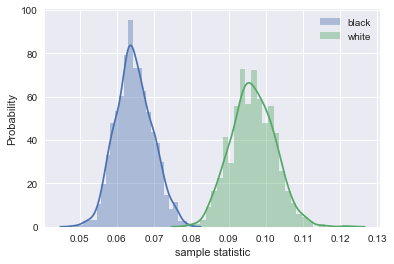

In [16]:
call_resampler.plot_sample_stats(95)

### Callback Statistics based on Sex:
The distributions are not well separable, therfore callbacks can not be mainly depenent to sex.

In [17]:
call_sex = data[['sex', 'call']]

In [18]:
Male_call = call_sex[call_sex.sex == 'm']['call'].values
Female_call = call_sex[call_sex.sex == 'f']['call'].values

In [19]:
call_resampler_sex = rs.Resampler_new([Male_call, Female_call], legend=['Male', 'Female'])

Male sample_stats mean: 0.073973
Male sample_stats std:  0.008177
Male 95% sample_stats mean: [ 0.06049822  0.0752803 ]
Female sample_stats mean: 0.082578
Female sample_stats std:  0.004466
Female 95% sample_stats mean: [ 0.08718861  0.08969568]


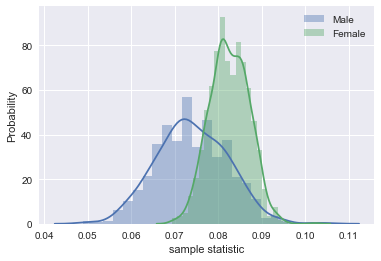

In [20]:
call_resampler_sex.plot_sample_stats(95)

# Other parameters:

Is it reasonable to relate the call_back difference only to race? What about other parameters, like 'year experience'? To check other parameters, we assume that the 'called' and the 'not called' applicants have close distributions in all parameters. So the null hypothesis for each parameter is defined as:

$H_0: E\{p|called\} = E\{p|not\_called\}$

$H_a: E\{p|called\} \neq E\{p|not\_called\}$

in which p is the mean value of the parameter under study, for example the mean of 'year experience'.

As seen, wit the use of z-test, a large number of hypotheses are rejected (pvalue$<$0.01). So the computations outcome weakens the assumption of the effect of race in applicants' call_back, because in addition to 'race' there is much more effective parameters.  

In [21]:
stat_df = data.copy()

stat_df.city = (stat_df.city == 'b')
stat_df.kind = (stat_df.kind=='a')
stat_df.sex = (stat_df.sex=='m')
stat_df.race = (stat_df.race=='w')

stat_df.city = stat_df.city.astype(float)
stat_df.kind = stat_df.kind.astype(float)
stat_df.sex = stat_df.sex.astype(float)
stat_df.race = stat_df.race.astype(float)

len_called = (stat_df.call==1).sum()
len_not_called = (stat_df.call==0).sum()

In [22]:
test_stats = pd.DataFrame()

means = stat_df.groupby('call').mean().rename({0:'not_called', 1:'called'})
sample_mean = means.ix['called'] - means.ix['not_called']

stds = (stat_df.groupby('call').std()).rename({0:'not_called', 1:'called'})
stds.ix['called'] = stds.ix['called'] / np.sqrt(len_called)
stds.ix['not_called'] = stds.ix['not_called'] / np.sqrt(len_not_called)
sample_mean_std = np.sqrt(stds.ix['called']**2 + stds.ix['not_called']**2)

test_stats['sample_mean'] = sample_mean

test_stats['sample_mean std'] = sample_mean_std

test_stats['z'] = abs(test_stats['sample_mean'] / test_stats['sample_mean std'])

test_stats['pvalue'] = 1-scp.stats.norm.cdf(test_stats['z'])

test_stats

,sample_mean,sample_mean std,z,pvalue
education,-0.015104,0.037473,0.403075,3.434467e-01
ofjobs,0.010356,0.068763,0.150599,4.401459e-01
yearsexp,1.139078,0.289350,3.936685,4.130748e-05
honors,0.059130,0.015965,3.703813,1.061915e-04
volunteer,0.013018,0.026047,0.499796,3.086093e-01
military,-0.022397,0.014166,1.581126,5.692458e-02
empholes,0.131405,0.026119,5.030962,2.440126e-07
occupspecific,22.075349,8.311656,2.655951,3.954257e-03
occupbroad,0.258691,0.106771,2.422869,7.699242e-03
workinschool,-0.050889,0.026342,1.931865,2.668809e-02


See the parameters with rejected null hypothesis, (pvalue<0.01)

In [23]:
test_stats[test_stats.pvalue < 0.01]

,sample_mean,sample_mean std,z,pvalue
yearsexp,1.139078,0.289350,3.936685,4.130748e-05
honors,0.059130,0.015965,3.703813,1.061915e-04
empholes,0.131405,0.026119,5.030962,2.440126e-07
occupspecific,22.075349,8.311656,2.655951,3.954257e-03
occupbroad,0.258691,0.106771,2.422869,7.699242e-03
specialskills,0.191793,0.026218,7.315342,1.283418e-13
race,0.108199,0.025882,4.180421,1.454849e-05
city,0.098912,0.026288,3.762597,8.407909e-05
adid,90.254944,18.151575,4.972293,3.308287e-07
fracwhite,0.042615,0.016690,2.553379,5.334166e-03


## Conclusion:

- A large number of effective parameters in applicants' call_back have been detected. Race is not the most eefective parameter.

- To find out if racial discrimination is still alive, it's recommended to split the applicants fairly, it means the black and white groups must have equality in other parameters.

- The splitted groups must differ in only one parameter to prevent sampling bias.